<a href="https://colab.research.google.com/github/Hamza-Khan993/GRIP-at-The-Spark-Foundation/blob/master/Task_5_To_Explore_Business_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Problem Statement

You are the business owner of the retail firm and want to see
how your company is performing. You are interested in finding
out the weak areas where you can work to make more profit.
What all business problems you can derive by looking into the
data?

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
from matplotlib import cm

%matplotlib inline


In [153]:
data = pd.read_csv("SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [179]:
data.shape

(9994, 13)

In [180]:
data.size

129922

In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Removing Duplicate values

In [10]:
data.duplicated().sum()

17

In [5]:
data.drop_duplicates(keep = 'first', inplace= True)
data.duplicated().sum()

0

Checking Null Values

In [12]:
data.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [15]:
data["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [16]:
data["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [18]:
data["Region"].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [19]:
data["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

Dropping Unnecessary Columns

In [154]:
data.drop(data[['Country', 'Postal Code']],axis=1,inplace=True)

In [155]:
group_data_City = data.groupby(['City']).sum()
group_data_City

,Sales,Quantity,Discount,Profit
City,,,,
Aberdeen,25.500,3,0.0,6.6300
Abilene,1.392,2,0.8,-3.7584
Akron,2729.986,65,7.5,-186.6356
Albuquerque,2220.160,65,0.8,634.0881
Alexandria,5519.570,84,0.0,318.6183
...,...,...,...,...
Woonsocket,195.550,15,0.0,78.6791
Yonkers,7657.666,57,1.0,2767.7557
York,817.978,19,2.1,-102.1692


In [156]:
g_data_state_profit = data.groupby("State").sum()
g_data_state_profit

,Sales,Quantity,Discount,Profit
State,,,,
Alabama,19510.6400,256,0.00,5786.8253
Arizona,35282.0010,862,68.00,-3427.9246
Arkansas,11678.1300,240,0.00,4008.6871
California,457687.6315,7667,145.60,76381.3871
Colorado,32108.1180,693,57.60,-6527.8579
Connecticut,13384.3570,281,0.60,3511.4918
Delaware,27451.0690,367,0.60,9977.3748
District of Columbia,2865.0200,40,0.00,1059.5893
Florida,89473.7080,1379,114.65,-3399.3017


Correlation Between Numeric Columns

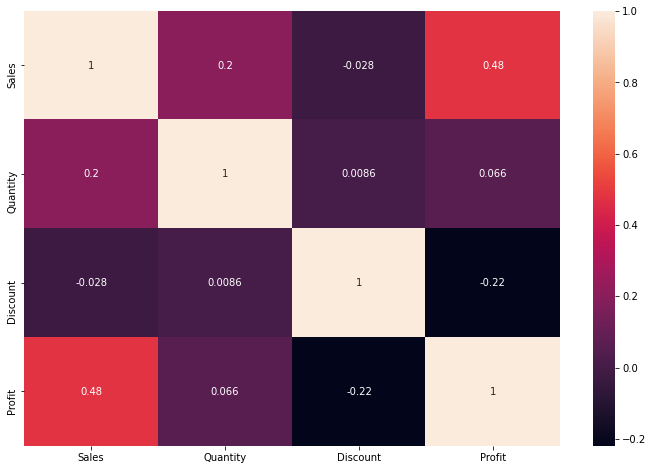

In [157]:
plt.figure(figsize = (12,8))
sns.heatmap(data.corr(), annot = True)

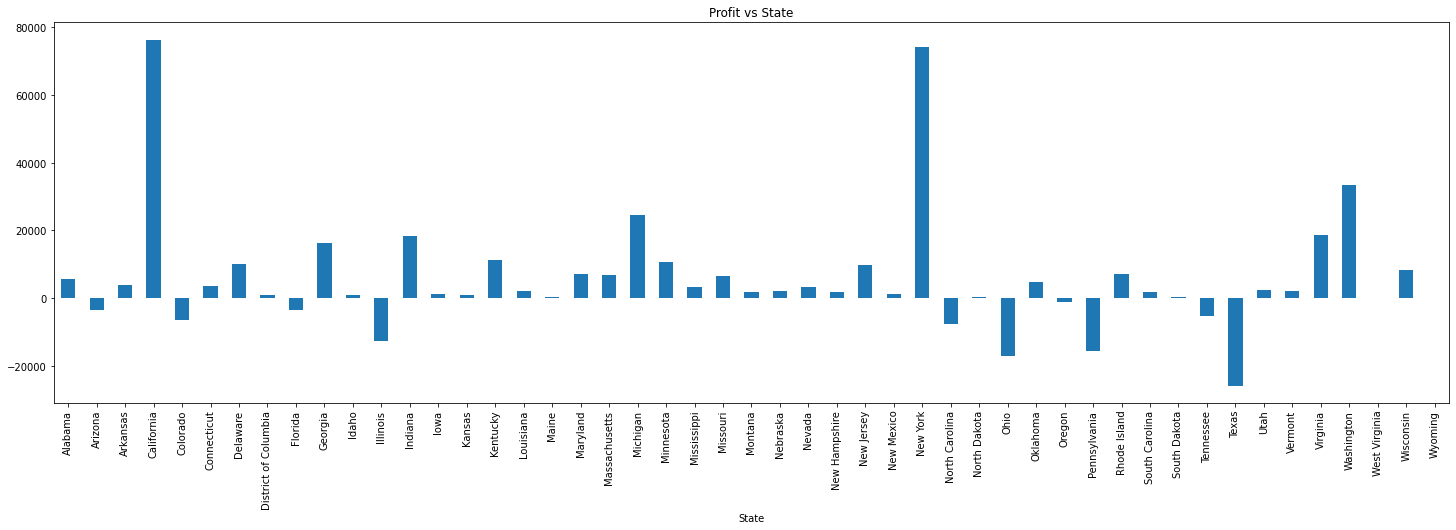

In [147]:
g_data_state_profit['Profit'].plot.bar(figsize = (25,7))
plt.title("Profit vs State")
plt.show()

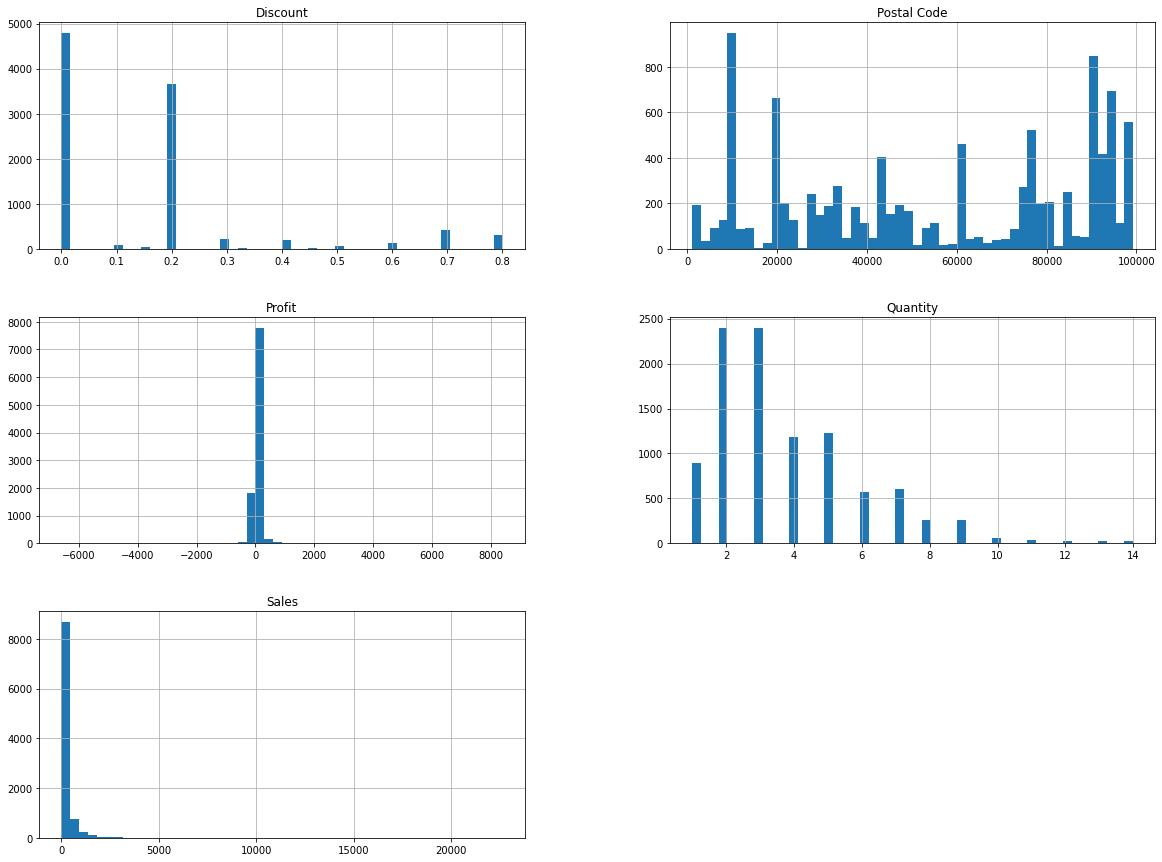

In [113]:
data.hist(bins = 50, figsize = (20,15))
plt.show()

In [49]:
data['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

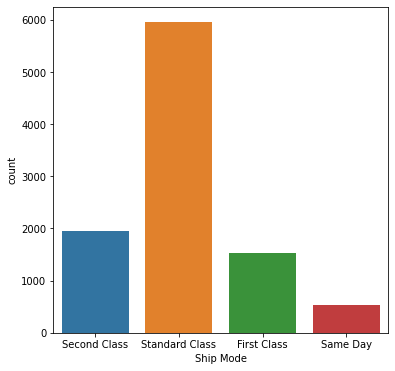

In [51]:
plt.figure(figsize= (6,6))
sns.countplot(x="Ship Mode", data=data)
plt.show()

In [55]:
data["Segment"].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

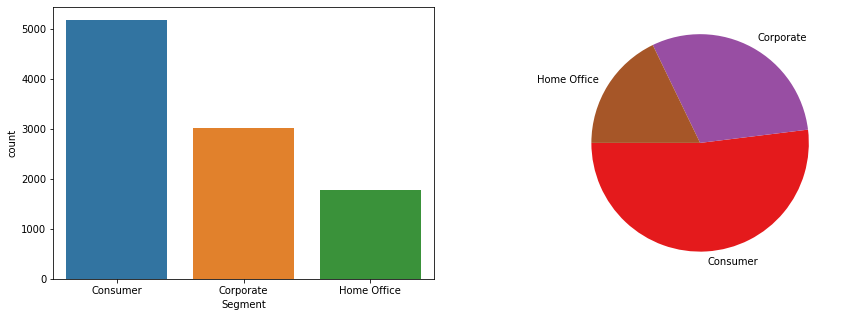

In [68]:
plt.figure(figsize=(15,5))
plt.subplot(121)

count = sns.countplot(x= "Segment", data=data)
# plt.show()

plt.subplot(122)
cs=cm.Set1(np.arange(3)/3)
pie = plt.pie(data["Segment"].value_counts(), labels=data["Segment"].value_counts().index,colors=cs, startangle=180, radius=1)

plt.show()

In [57]:
data["Region"].value_counts()

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64

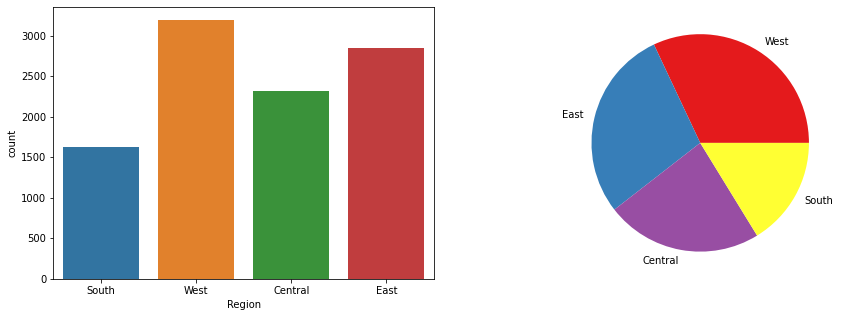

In [73]:
plt.figure(figsize=(15,5))
plt.subplot(121)

count = sns.countplot(x= "Region", data=data)
# plt.show()

plt.subplot(122)
cs=cm.Set1(np.arange(5)/5.)
pie = plt.pie(data["Region"].value_counts(),  labels=data["Region"].value_counts().index,colors=cs, startangle=0, radius=1)
theme = plt.get_cmap('hsv')

plt.show()

In [52]:
data["Category"].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

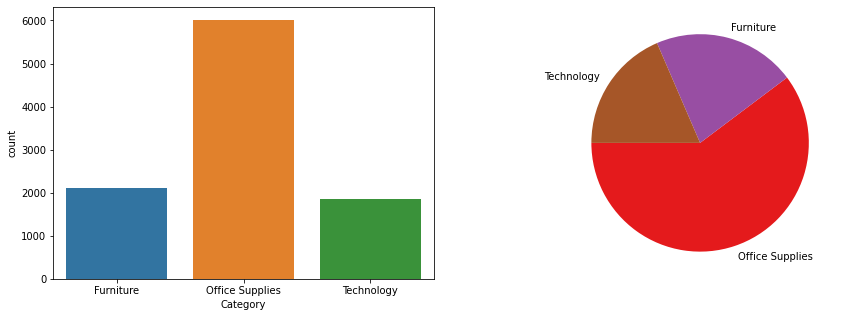

In [75]:
plt.figure(figsize=(15,5))
plt.subplot(121)

count = sns.countplot(x= "Category", data=data)
# plt.show()

plt.subplot(122)
cs=cm.Set1(np.arange(3)/3)
pie = plt.pie(data["Category"].value_counts(), labels=data["Category"].value_counts().index,colors=cs ,startangle=180, radius=1)

plt.show()

In [59]:
data["Sub-Category"].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

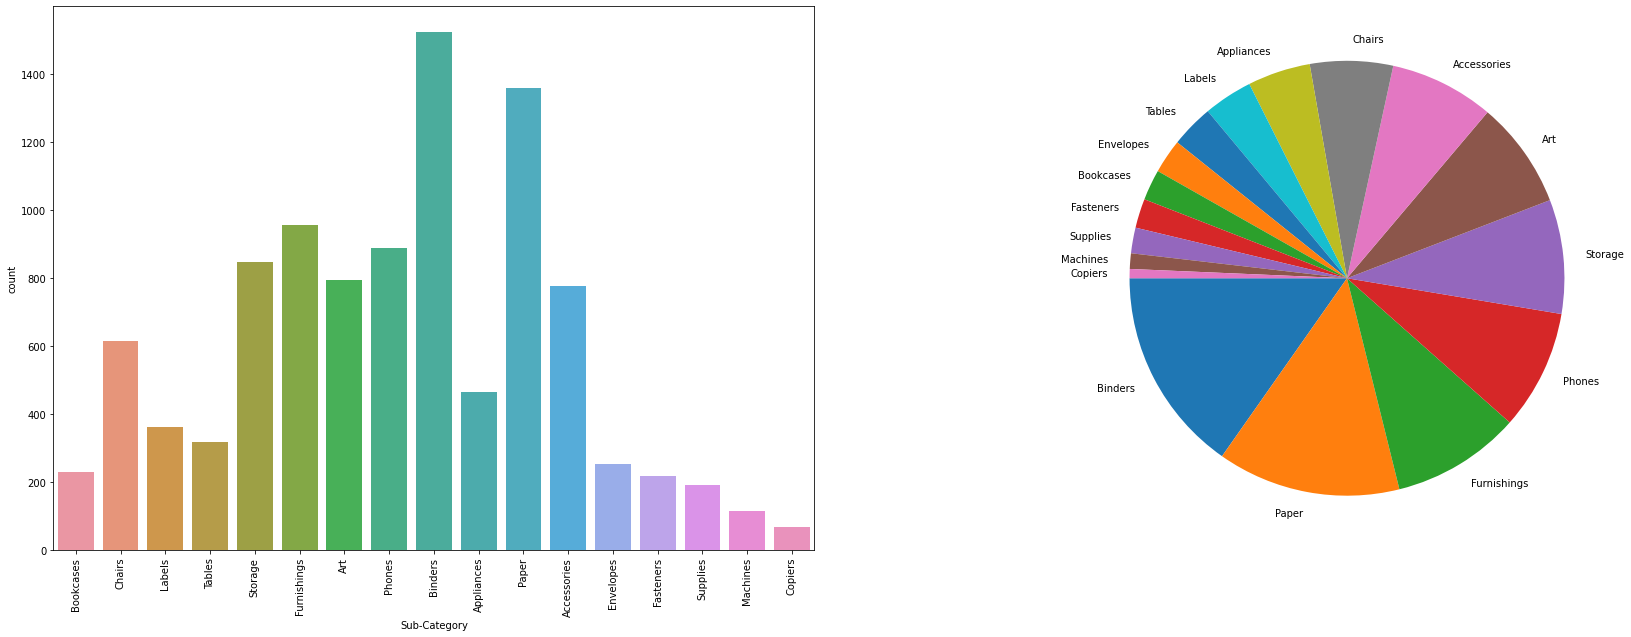

In [101]:
plt.figure(figsize=(30,10))
plt.subplot(121)

count = sns.countplot(x= "Sub-Category", data=data)
plt.xticks(rotation=90)
# plt.show()

plt.subplot(122)
# cs=cm.Set1(np.arange(20)/20.)
# f=plt.figure()
# ax=f.add_subplot(122, aspect='equal')

pie = plt.pie(data["Sub-Category"].value_counts(), labels=data["Sub-Category"].value_counts().index,startangle=180, radius=1)

plt.show()

In [97]:
data.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


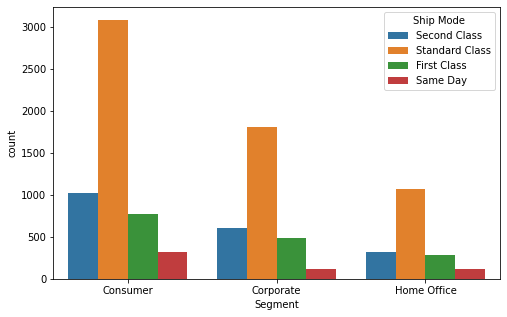

In [68]:
plt.figure(figsize = (8,5))
sns.countplot(x="Segment", hue = "Ship Mode", data=data)

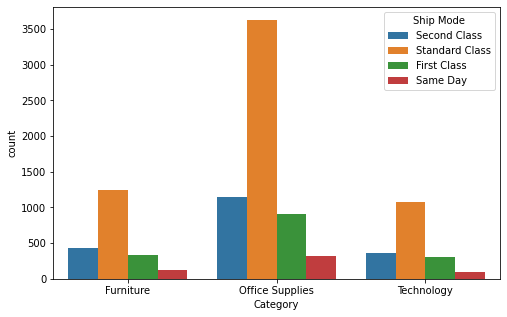

In [73]:
plt.figure(figsize = (8,5))
sns.countplot(x="Category", hue = "Ship Mode", data=data)

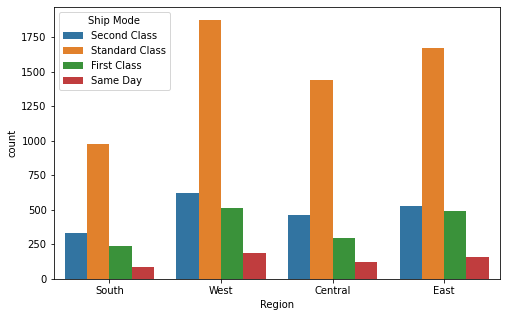

In [74]:
plt.figure(figsize = (8,5))
sns.countplot(x="Region", hue = "Ship Mode", data=data)

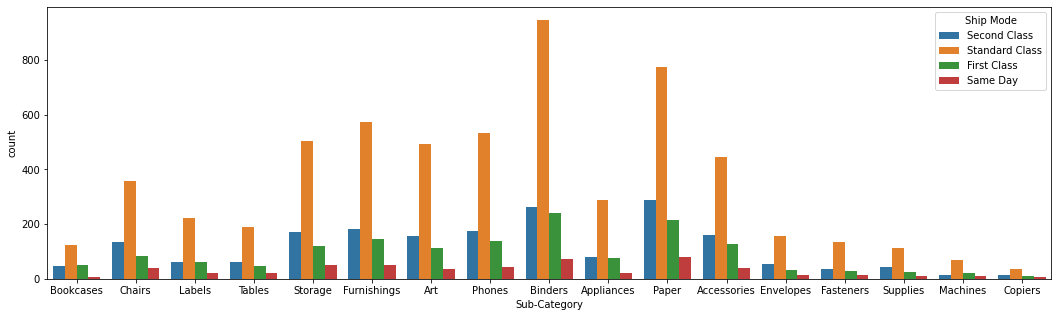

In [84]:
plt.figure(figsize = (18,5))
sns.countplot(x="Sub-Category", hue = "Ship Mode", data=data)

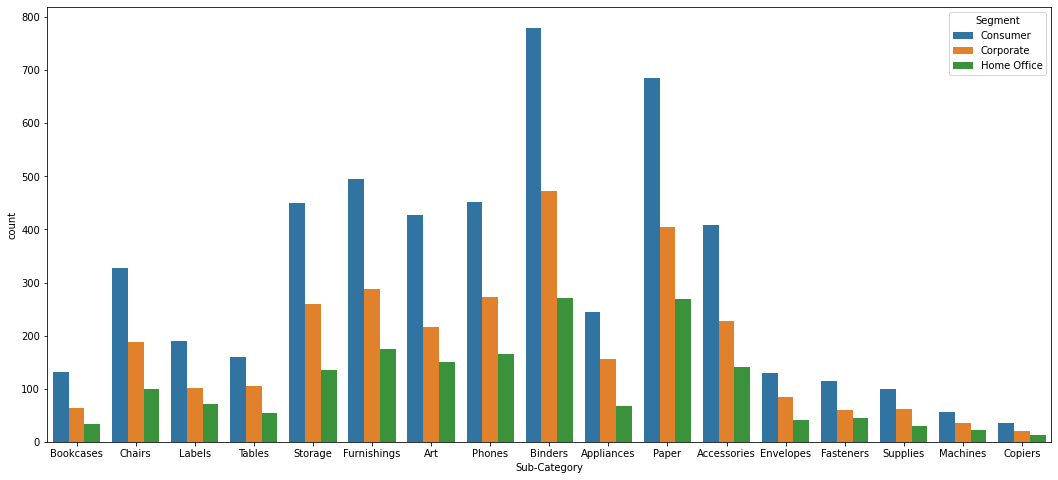

In [89]:
plt.figure(figsize = (18,8))
sns.countplot(x="Sub-Category", hue = "Segment", data=data)

<Figure size 3600x1440 with 0 Axes>

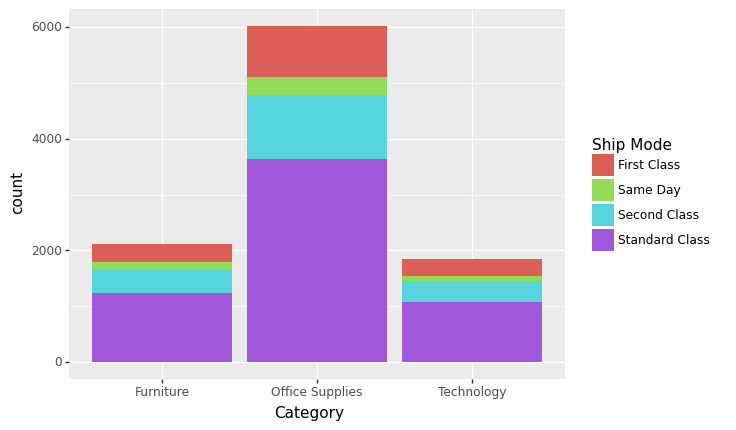

<ggplot: (8730471410461)>

In [81]:
plt.figure(figsize= (50,20))
ggplot(data, aes(x = "Category", fill = "Ship Mode")) + \
    geom_bar(stat="count")

<Figure size 3600x1440 with 0 Axes>

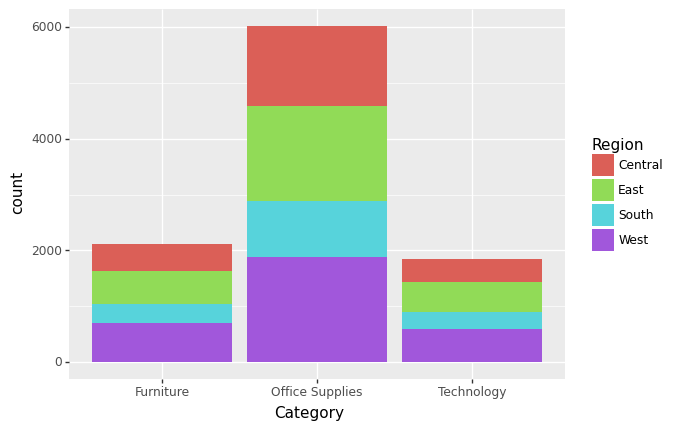

<ggplot: (8730469114218)>

In [115]:
plt.figure(figsize= (50,20))
ggplot(data, aes(x = "Category", fill = "Region")) + \
    geom_bar(stat="count")

Segment Count in each State

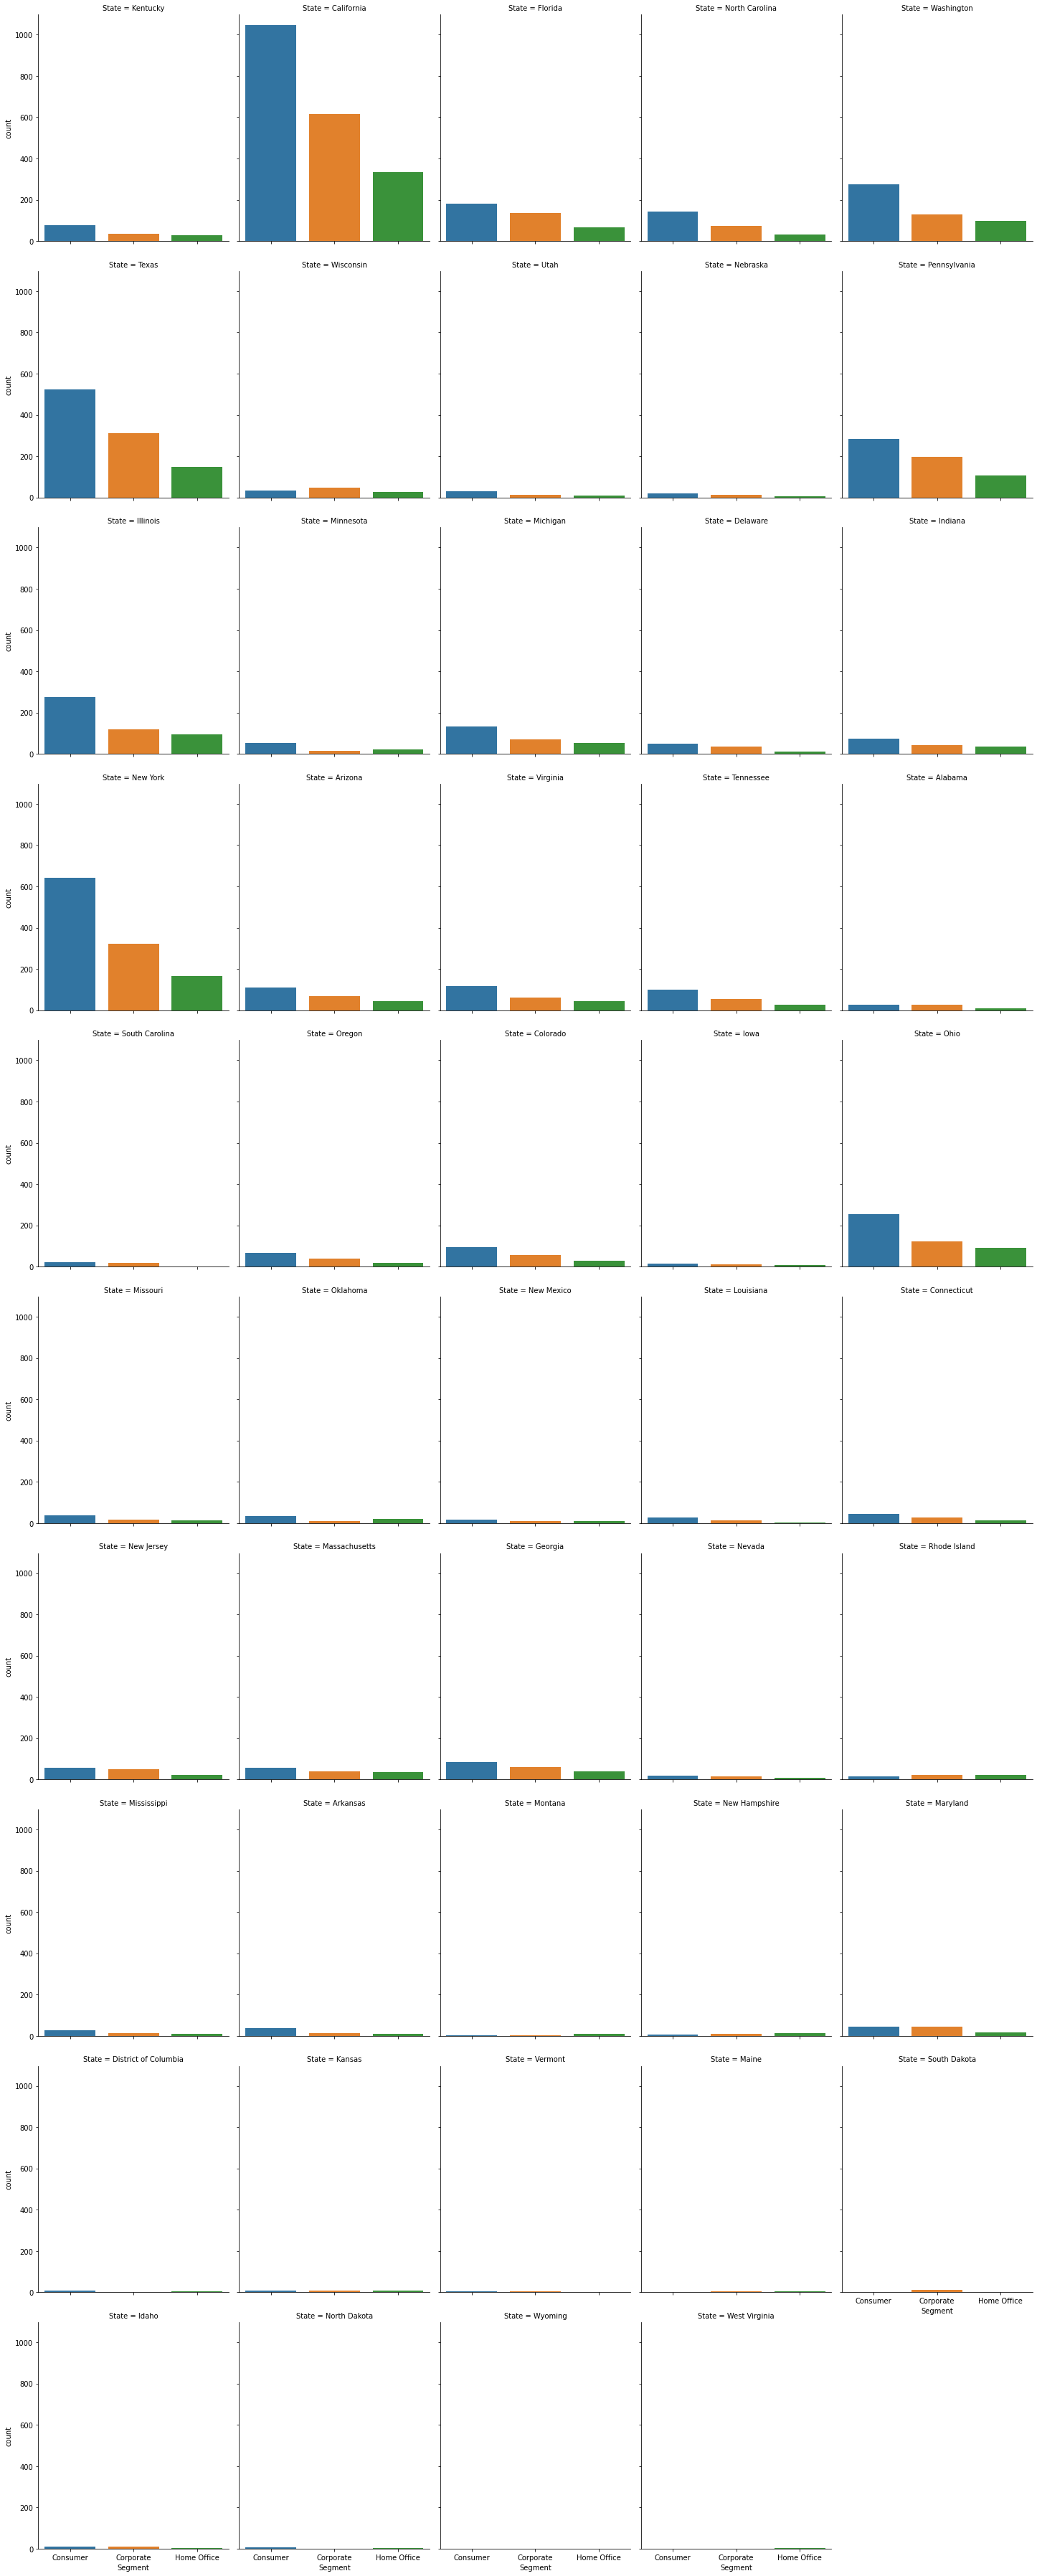

In [141]:
# plt.figure(figsize=(,15))
sns.catplot(x='Segment', col="State", col_wrap=5, data=data, kind="count", height=5,  aspect=0.8)

Sales Vs Profit

Text(0.5, 1.0, 'Sales vs Profit')

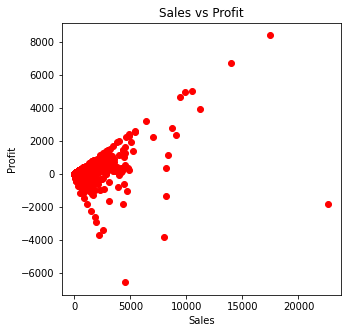

In [144]:
plt.figure(figsize=(5,5))
plt.scatter(data["Sales"], data["Profit"], color = "red")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Sales vs Profit")

In [182]:
g_data_ship_profit = data.groupby("Ship Mode")["Profit"].sum()
g_data_ship_profit

Ship Mode
First Class        48969.8399
Same Day           15891.7589
Second Class       57446.6354
Standard Class    164088.7875
Name: Profit, dtype: float64

In [185]:
g_data_ship_sales = data.groupby("Ship Mode")["Sales"].sum()
g_data_ship_sales

Ship Mode
First Class       3.514284e+05
Same Day          1.283631e+05
Second Class      4.591936e+05
Standard Class    1.358216e+06
Name: Sales, dtype: float64

Profit and Sales for each Sub-Category

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


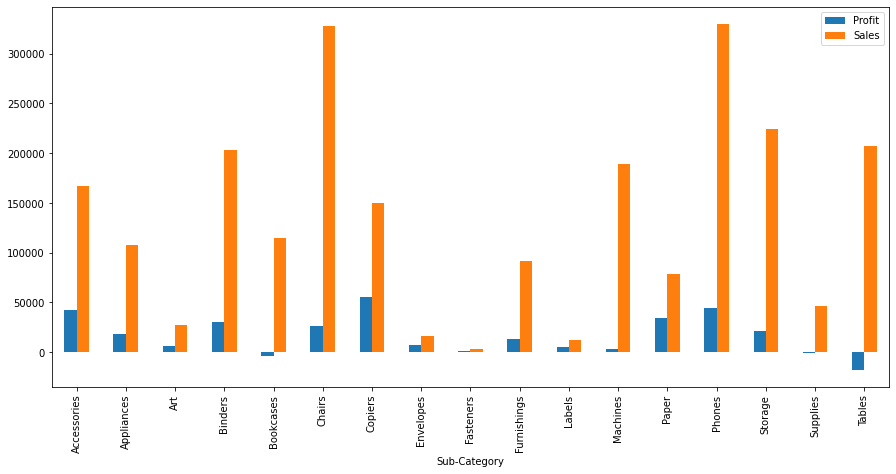

In [8]:
data.groupby("Sub-Category")["Profit", "Sales"].sum().plot.bar(figsize=(15,7))
plt.show()

Profit and Sales of each Category

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


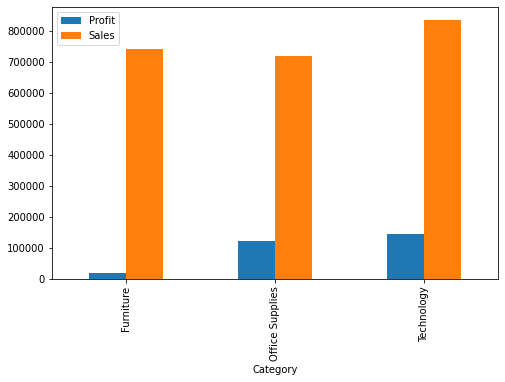

In [12]:
data.groupby("Category")["Profit", "Sales"].sum().plot.bar(figsize=(8,5))
plt.show()

Profit and Sales in each Segment

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


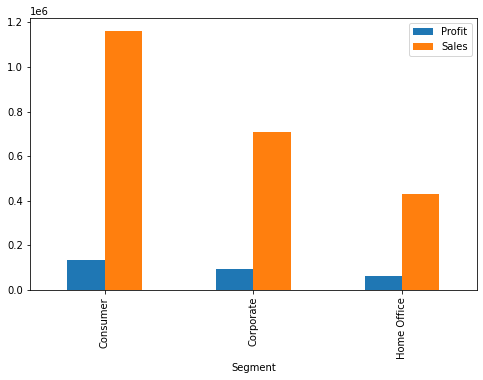

In [11]:
data.groupby("Segment")["Profit", "Sales"].sum().plot.bar(figsize=(8,5))
plt.show()

Profit and Sales in each State

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


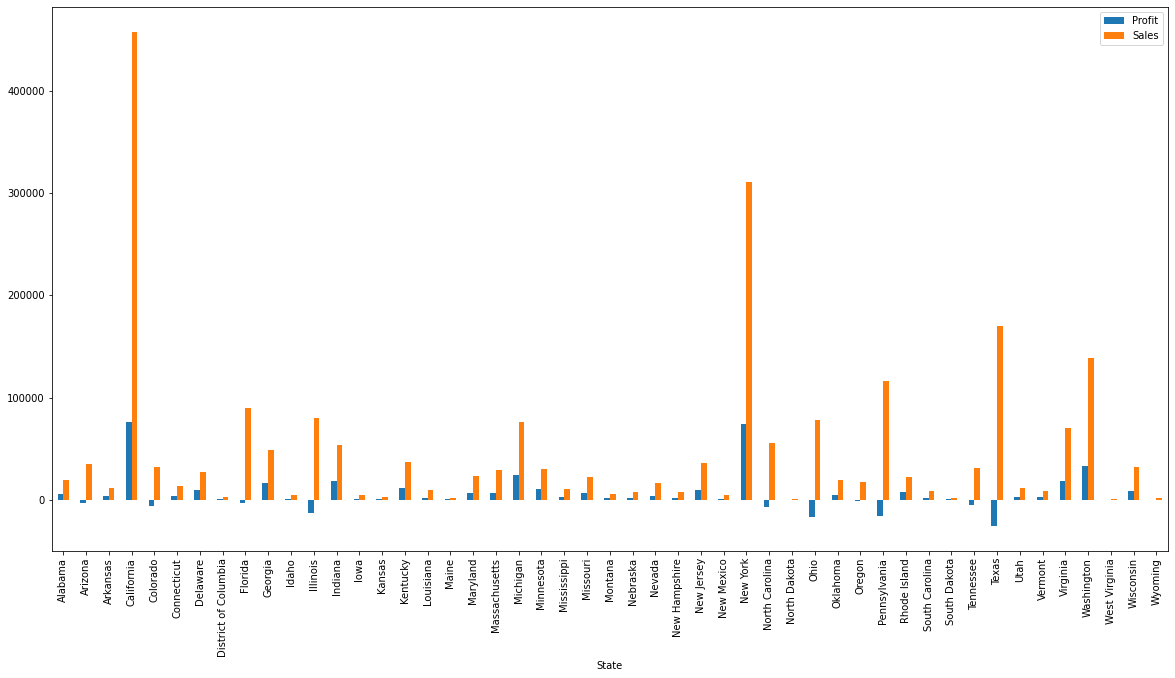

In [15]:
data.groupby("State")["Profit", "Sales"].sum().plot.bar(figsize=(20,10))
plt.show()

### *Even though the Sales are High in States like Arizona, Colorado, Florida, Illinois, North Carolina, Ohio, Pennsylvania, Tennessee, Texas, the Shop is generating **LOSS** instead of Profit*

Segment wise Sales in each State

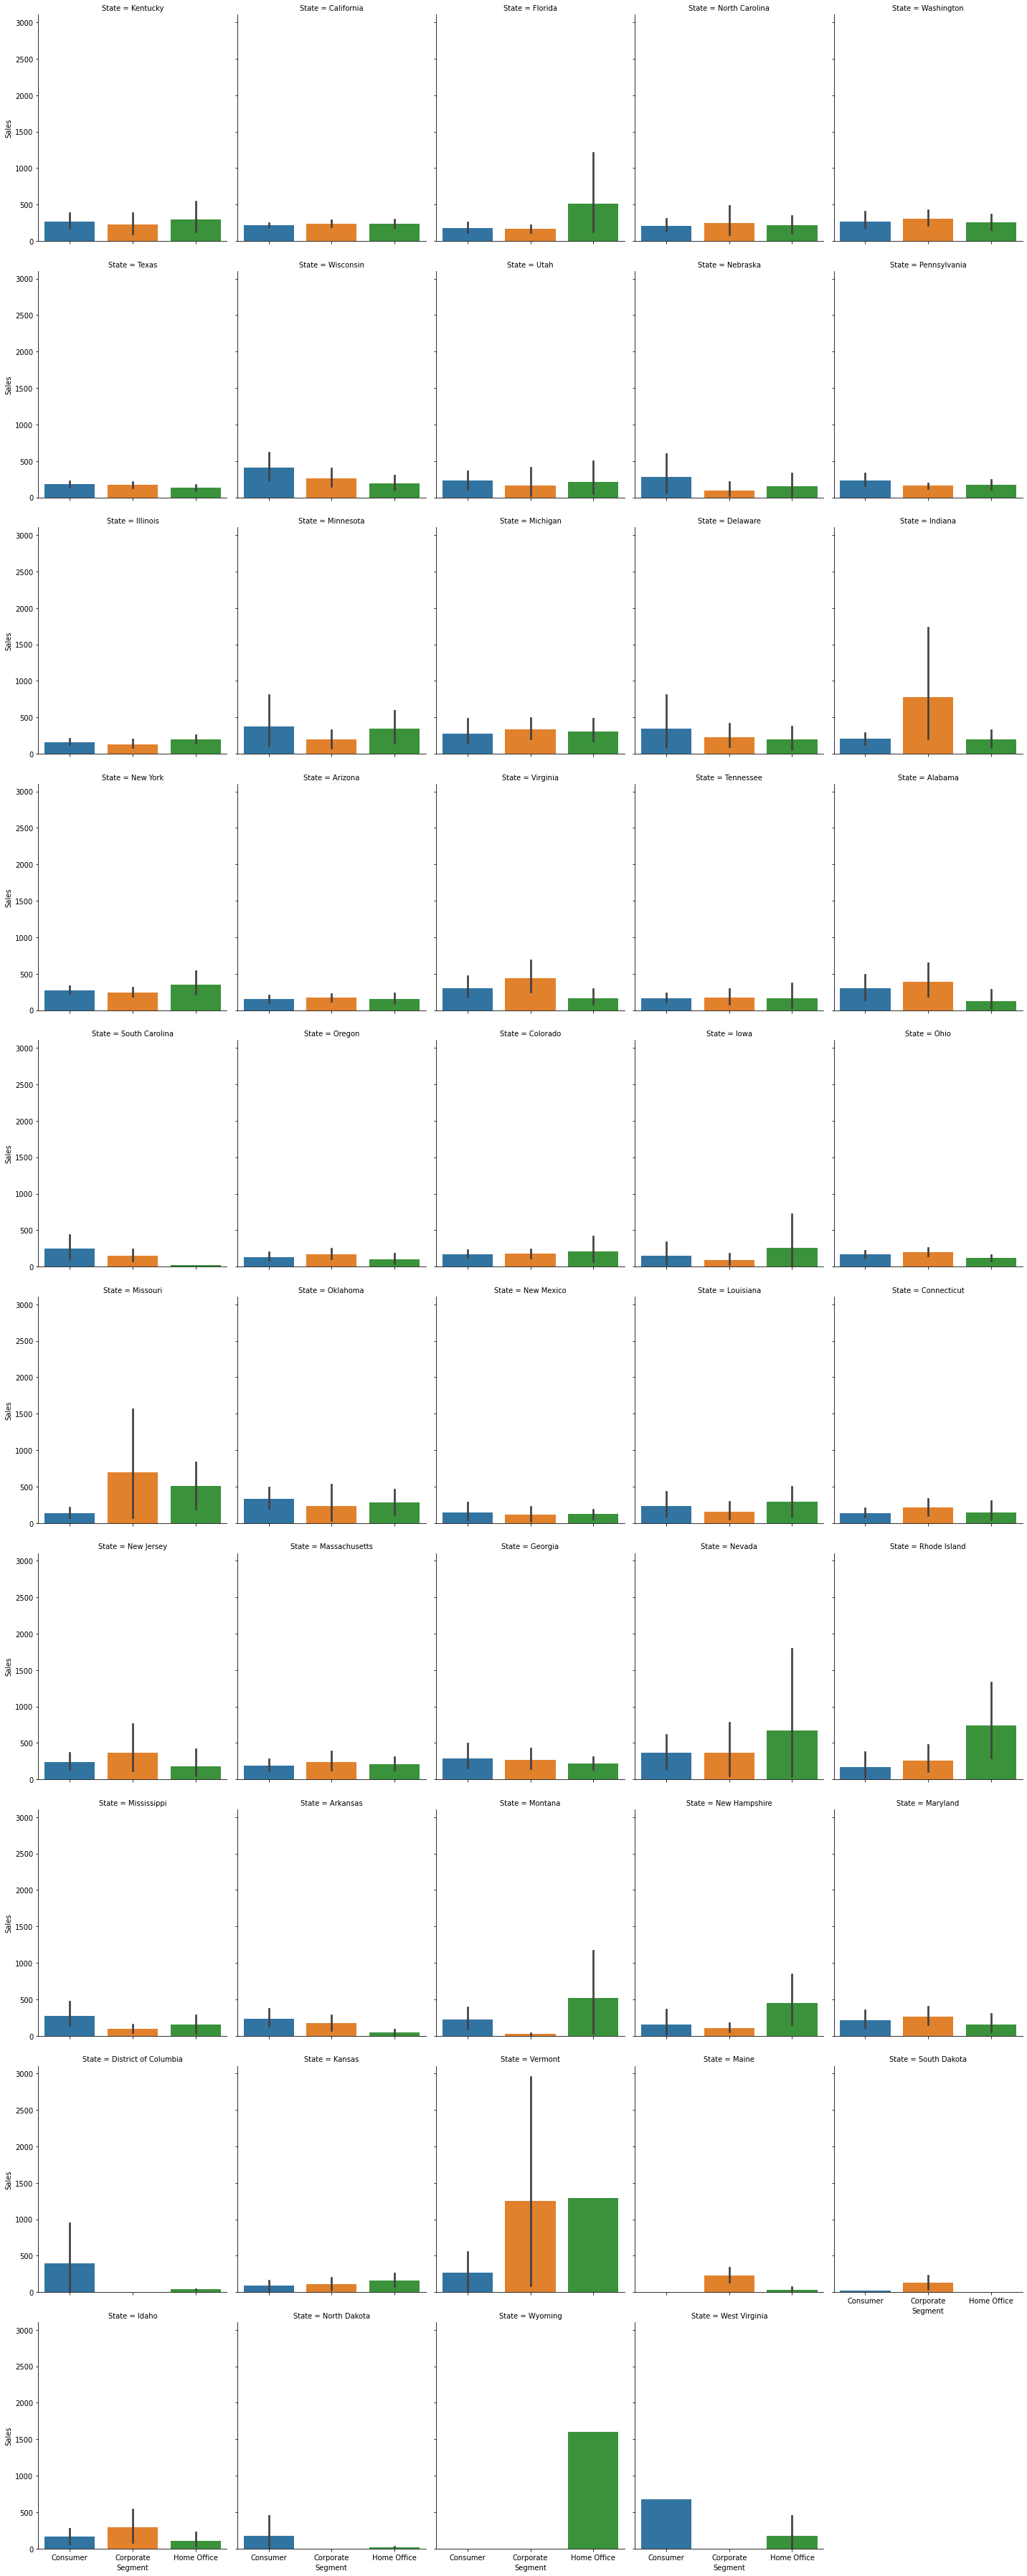

In [109]:
sns.catplot(x='Segment', y='Sales', col="State", col_wrap=5, data=data, kind="bar", height=5,  aspect=0.8)

Segment wise Profit in each State

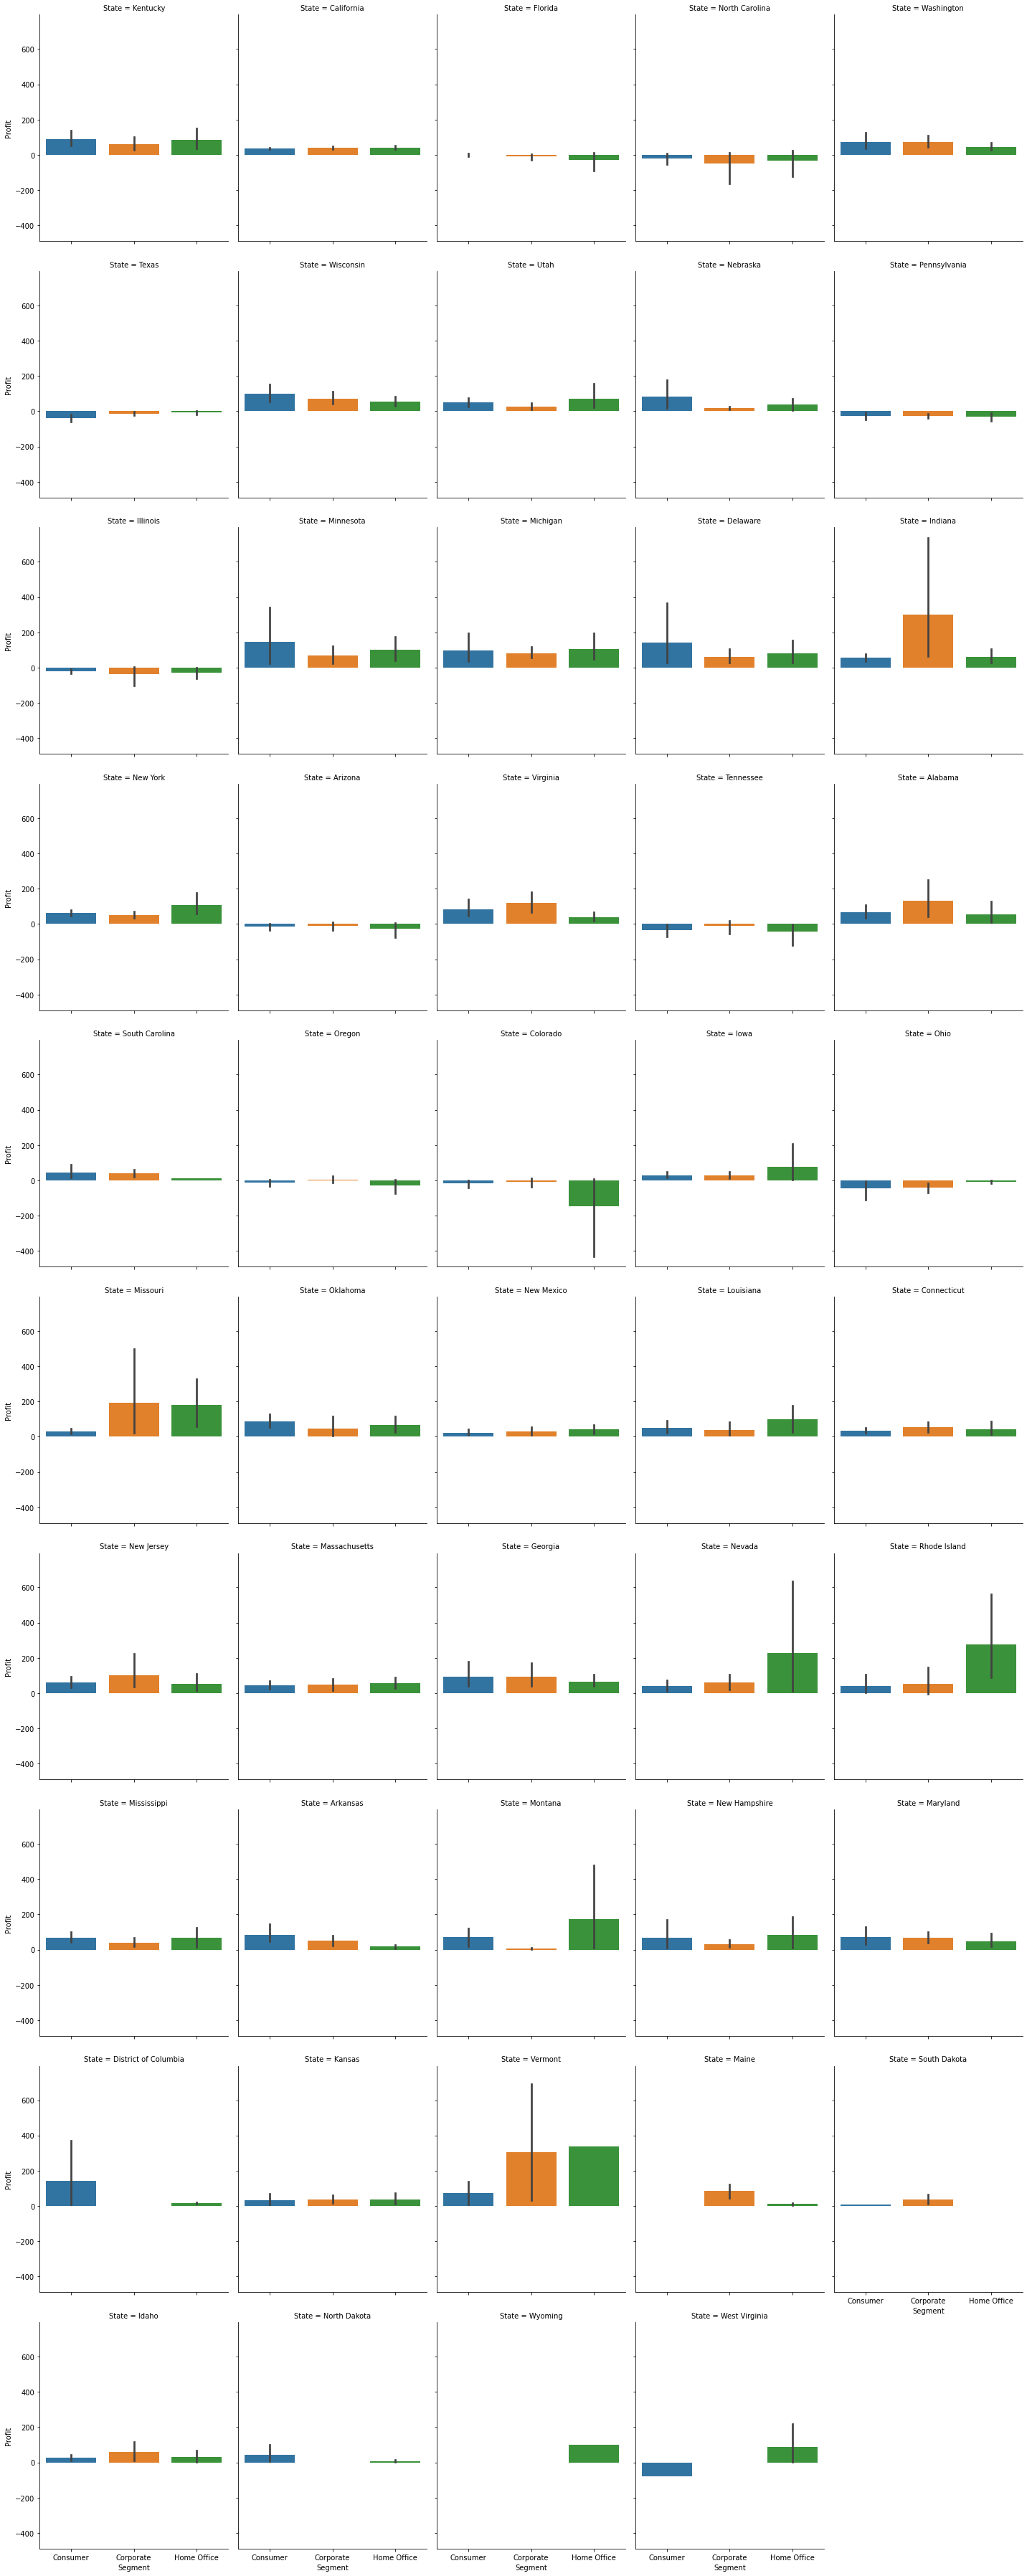

In [143]:
sns.catplot(x='Segment',y='Profit' ,col="State", col_wrap=5, data=data, kind="bar", height=5,  aspect=0.8)

Insights After Observing above Graph.

The Consumer segment, Corporate segment and Home Offices in states like Florida, North Carolina, Texas, Pennsylvania, Arizona, Tennesse, Oregon,Ohio, Colorado, are genarating **LOSS** instead of Profit.


The Consumer Segment in states Wyoming, Maine, Florida are genarating **ZERO** Profit.

The Corporate segment in states West Virginia, Wyoming, North Dakota, District of Columbia are generating  **ZERO** Profit.

The Home Offices in state like South Dakota are generating **ZERO** Profit.

Category Wise Sales In Each State

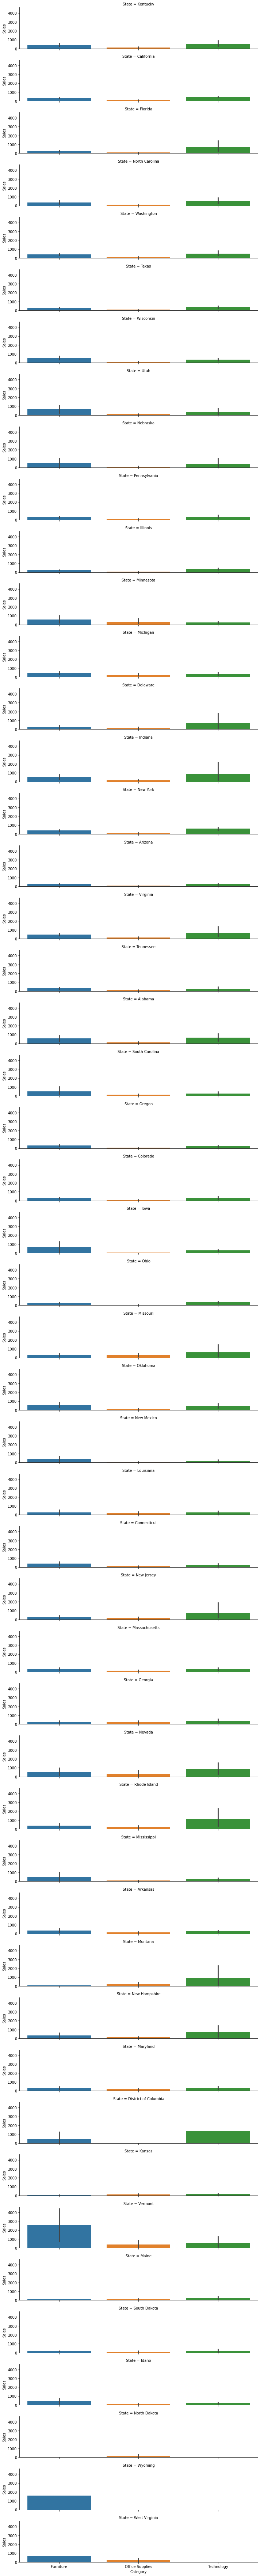

In [120]:
sns.catplot(x='Category',y="Sales" ,row="State", data=data, kind="bar", height=2,  aspect=5)

INSIGHTS BY OBSERVING ABOVE GRAPH

Sales for Technology Category in West Virginia and Wyoming is almost null

Sales for Furniture Category in New Hamsphire, Vermont, South Dakota and Wyoming is very low



Category Wise Profit In Each State

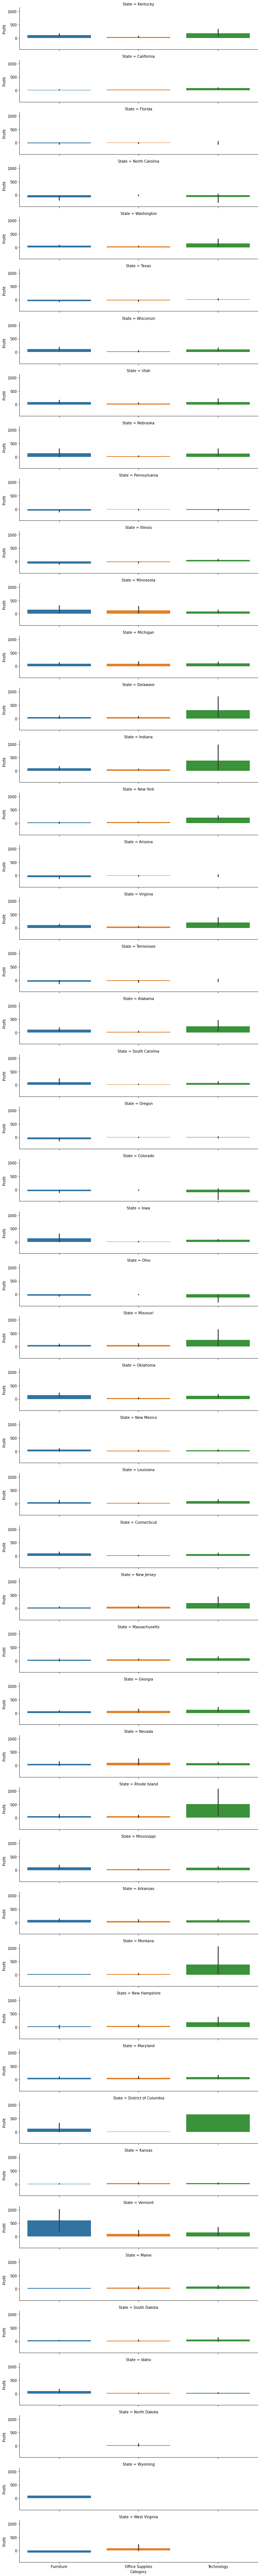

In [121]:
sns.catplot(x='Category',y='Profit' ,row="State", data=data, kind="bar", height=2,  aspect=5)

MANY INTUITIONS CAN BE GENERATED FROM THE ABOVE GRAPH.

FOR EXAMPLE
No Profit or Negative Profit(Loss) is generated in Technology Category in States like West Virginia, Wyoming, Tennessee, Arizona, Florida, North Carolina, Pennsylvania,Colorado, Ohia

No Profit or Negative profit(Loss) is generated in Furniture Category in States like North Dakota, Wyoming, Tennessee, Arizona, Florida, Ohio, Colorado, Oregon, Illinois, Pennsylvania, Texas, North Carolina, Florida

No Profit or Negative profit(Loss) is generated in Furniture Category in States like DistrictOf Columbia, Wyoming, Tennessee, Arizona, Florida, Ohio, Colorado,  Illinois, Texas, North Carolina, Florida



Segment wise Sales in Sub-Category

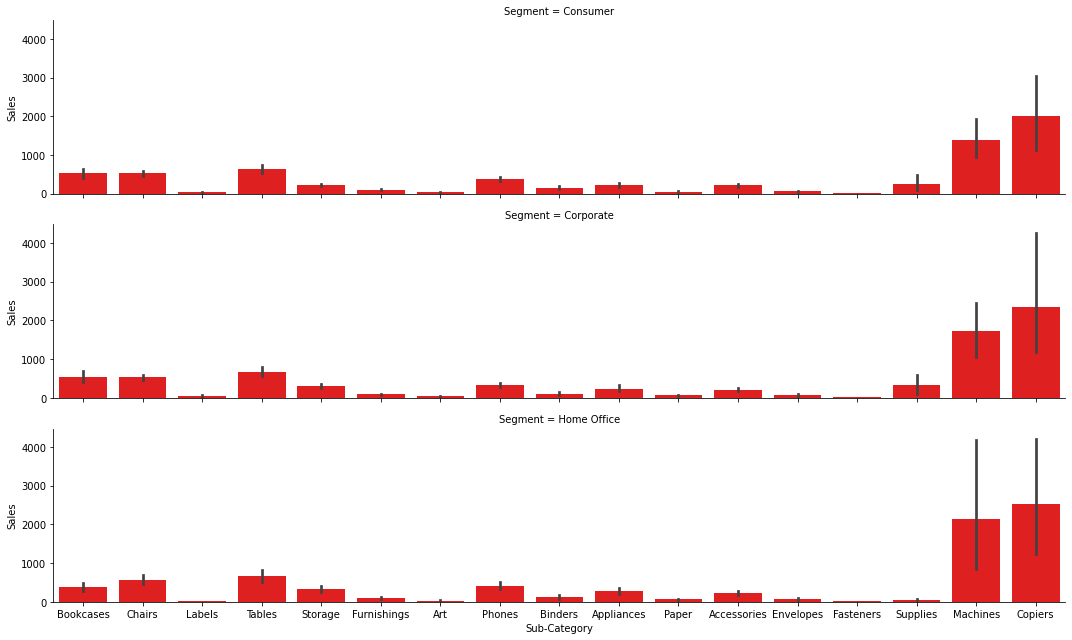

In [124]:
sns.catplot(x='Sub-Category',y='Sales' ,row="Segment",  data=data, kind="bar", height=3,  aspect=5, color='red')

Segment wise Profit For Each Sub_Category

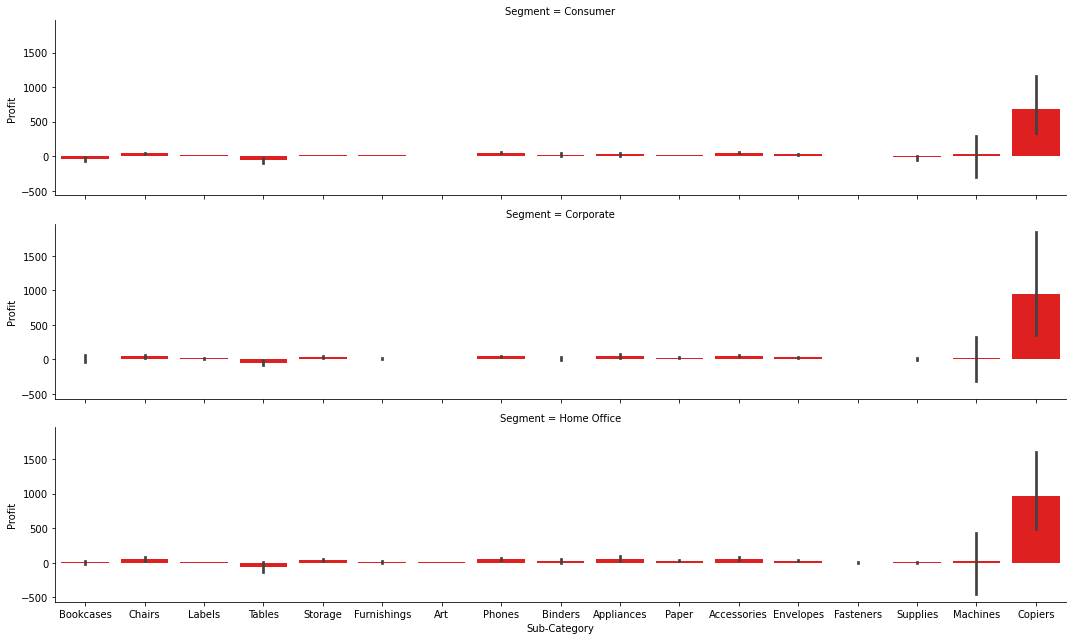

In [123]:
sns.catplot(x='Sub-Category',y='Profit' ,row="Segment",  data=data, kind="bar", height=3,  aspect=5, color='red')

**Many intuitions can be generated by observing the above graph.**

For Example

1) Selling Tables for each segment is proving to be unnecessary because it only generates loss***

---
2) Machines have High Sales but the margin is low.

---







In [127]:
data

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


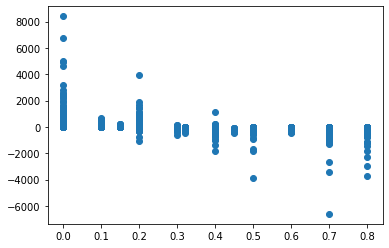

In [128]:
plt.scatter(data["Discount"], data['Profit'])

High Discount Generates Less Profit

While low Discounts Generates High Profit

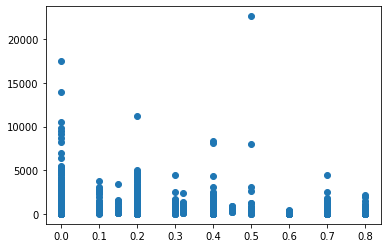

In [129]:
plt.scatter(data["Discount"], data['Sales'])

Discounts Also affects Sales

Low Discounts generates High Sales

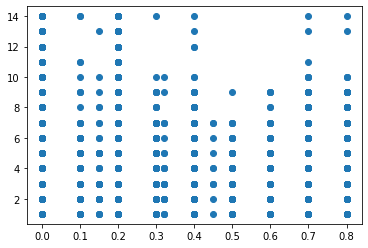

In [130]:
plt.scatter(data["Discount"], data['Quantity'])

##Thank You